In [320]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import numpy.fft

In [321]:
def get_LT_NGP(ngrid, gridWidth, pos):
    LT_NGP = np.floor(pos/gridWidth)
    return LT_NGP



def get_rho(ngrid, gridWidth, LT_NGP, m):

    rho = np.zeros((ngrid,ngrid))

    if not(type(m) == int):
        for i in range(LT_NGP.shape[0]):
            gridCord = LT_NGP[i]
            rho[int(gridCord[0])][int(gridCord[1])] += m[i]
    else:
        for i in range(LT_NGP.shape[0]):
            gridCord  = LT_NGP[i]
            rho[int(gridCord[0])][int(gridCord[1])] += m
    
    rho /= gridWidth**2
    
    return rho



def get_kernel(ngrid,r0):
    x=np.fft.fftfreq(ngrid)*ngrid
    rsqr=np.outer(np.ones(ngrid),x**2)
    rsqr=rsqr+rsqr.T
    rsqr[rsqr<r0**2]=r0**2
    kernel=rsqr**-0.5
    return kernel



def get_potential(rho,kernel,ngrid):

    rhoFT= np.fft.rfft2(rho)
    kernelFT = np.fft.rfft2(kernel)
    pot = np.fft.irfft2(rhoFT*kernelFT,[ngrid,ngrid])
    return pot 


  
def get_force(ngrid,gridWidth, LT_NGP,pot):

    f = np.zeros((LT_NGP.shape[0],2))

    for i in range(LT_NGP.shape[0]):
        x  = int(LT_NGP[i][0])
        y =  int(LT_NGP[i][1])

        f[i][0] = (pot[(x+1) % ngrid][y]-pot[(x-1) % ngrid][y])/(2*gridWidth)
        f[i][1] = (pot[x][(y+1) % ngrid]-pot[x][(y-1) % ngrid])/(2*gridWidth)
    return f


def take_step(pos,v,f,dt):
    pos[:]=pos[:]+dt*v
    v[:]=v[:]+f*dt
    return pos, v


In [322]:
class particles:
    def __init__(self,npart=10000,ngrid=500, dx = 1, dt =0.02, soft=1,periodic=True):
        self.pos=np.empty([npart,2])
        self.m=np.empty(npart)
        self.f=np.empty([npart,2])
        self.v=np.empty([npart,2])
        self.kernel=[]
        self.npart=npart
        self.ngrid=ngrid
        self.gridWidth = dx
        self.dt = dt
        self.LT_NGP=np.empty([self.npart,2])
        self.rho=np.empty([self.ngrid,self.ngrid])
        self.pot=np.empty([self.ngrid,self.ngrid])
        
        self.soft=soft
        self.periodic=periodic

    def ics_2gauss(self):
        self.pos[:]=np.random.randn(self.npart,2)*(self.ngrid/12)+self.ngrid/2
        self.pos[:self.npart//2,0]=self.pos[:self.npart//2,0]-self.ngrid/5
        self.pos[self.npart//2:,0]=self.pos[self.npart//2:,0]+self.ngrid/5
        self.pos[:] = self.pos[:]%self.ngrid
        self.m =1
        self.v[:]=0
        self.v[:self.npart//2,1]=25
        self.v[self.npart//2:,1]=-25      



<built-in function len>
<built-in function len>
<built-in function len>
6250033.713043896 1352383.0795879231 5573842.173249934


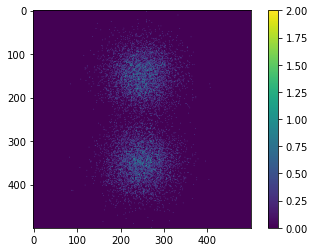

<built-in function len>
<built-in function len>
<built-in function len>
6250113.404066242 1352505.155633598 5573860.826249443


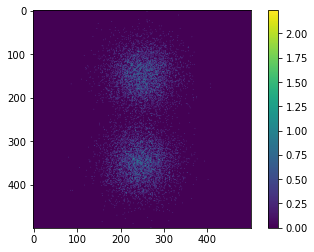

<built-in function len>
<built-in function len>
<built-in function len>
6250243.157236997 1352512.0495307106 5573987.1324716415


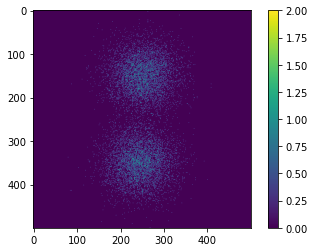

<built-in function len>
<built-in function len>
<built-in function len>
6250385.571710311 1352635.0881579332 5574068.027631344


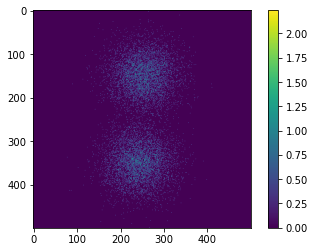

<built-in function len>
<built-in function len>
<built-in function len>
6250584.283076995 1352844.0044449873 5574162.280854502


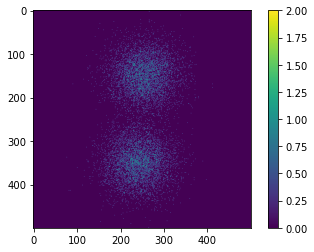

<built-in function len>
<built-in function len>
<built-in function len>
6250833.68807134 1353056.802186953 5574305.286977864


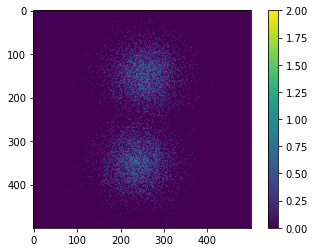

<built-in function len>
<built-in function len>
<built-in function len>
6251127.963981869 1353298.6046646286 5574478.661649554


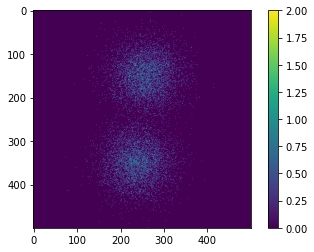

<built-in function len>
<built-in function len>
<built-in function len>
6251476.696689438 1353701.8180696194 5574625.787654628


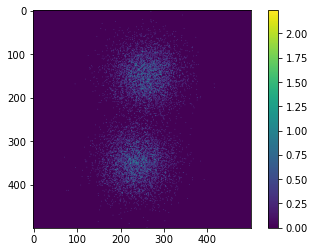

<built-in function len>
<built-in function len>
<built-in function len>
6251871.363676661 1354019.9009355016 5574861.41320891


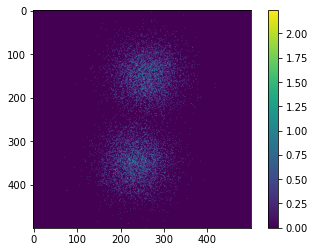

<built-in function len>
<built-in function len>
<built-in function len>
6252333.474705704 1354595.3173924284 5575035.81600949


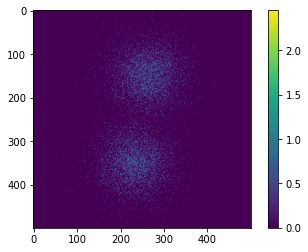

<built-in function len>
<built-in function len>
<built-in function len>
6252858.889067216 1354894.7458651508 5575411.51613464


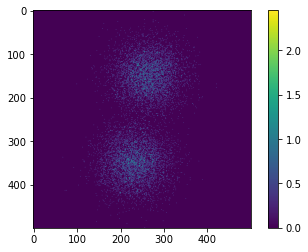

<built-in function len>
<built-in function len>
<built-in function len>
6253455.681968497 1355606.228780676 5575652.567578159


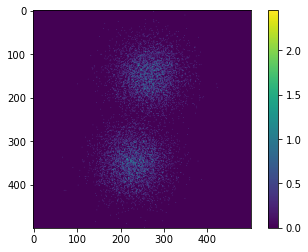

<built-in function len>
<built-in function len>
<built-in function len>
6254135.89101794 1356118.6616833727 5576076.560176253


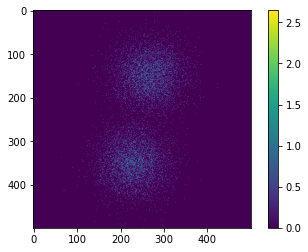

<built-in function len>
<built-in function len>
<built-in function len>
6254913.718126564 1356997.9396447043 5576414.7483042125


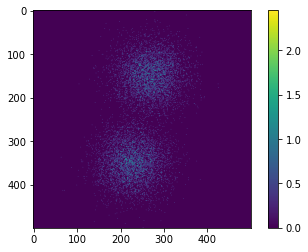

<built-in function len>
<built-in function len>
<built-in function len>
6255803.301858826 1357839.1963659213 5576883.703675865


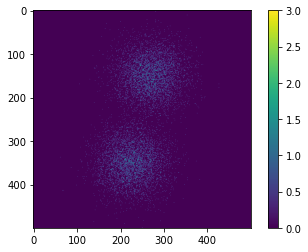

<built-in function len>
<built-in function len>
<built-in function len>
6256765.376657157 1358759.732374499 5577385.510469908


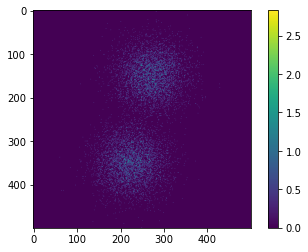

<built-in function len>
<built-in function len>
<built-in function len>
6257847.3325608075 1359885.2726473366 5577904.696237139


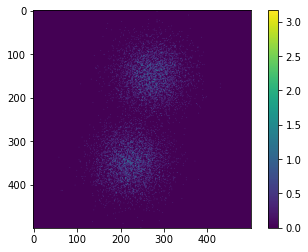

<built-in function len>
<built-in function len>
<built-in function len>
6259066.2873488255 1361095.2679736414 5578518.653362005


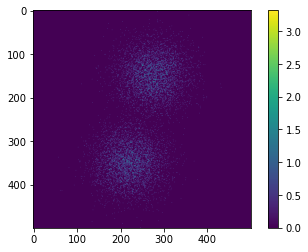

<built-in function len>
<built-in function len>
<built-in function len>
6260397.897630616 1362320.93273818 5579237.431261526


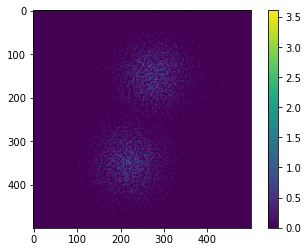

<built-in function len>
<built-in function len>
<built-in function len>
6261865.658454166 1363952.2614916891 5579889.527708321


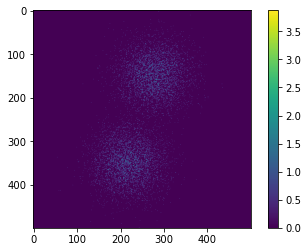

<built-in function len>
<built-in function len>
<built-in function len>
6263468.878512198 1365538.582241607 5580699.587391395


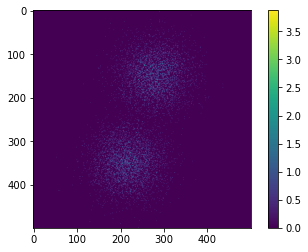

<built-in function len>
<built-in function len>
<built-in function len>
6265200.051920111 1367096.2193656326 5581651.942237295


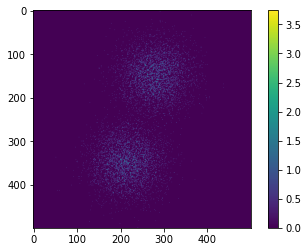

<built-in function len>
<built-in function len>
<built-in function len>
6267049.048297404 1369203.0039115539 5582447.546341628


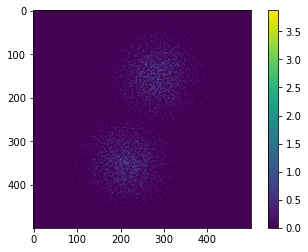

<built-in function len>
<built-in function len>
<built-in function len>
6269041.030765466 1371192.0589685084 5583445.001281212


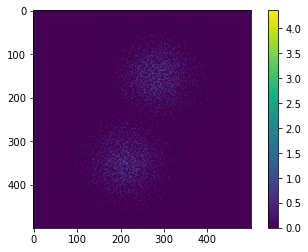

<built-in function len>
<built-in function len>
<built-in function len>
6271169.159079943 1373319.6829445655 5584509.31760766


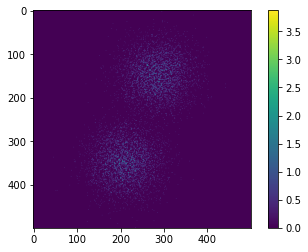

<built-in function len>
<built-in function len>
<built-in function len>
6273400.690012089 1375316.791354175 5585742.294335001


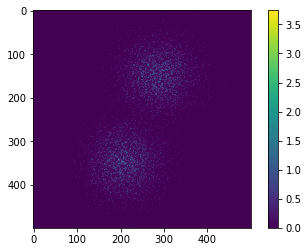

<built-in function len>
<built-in function len>
<built-in function len>
6275785.850629964 1377834.2634720874 5586868.71889392


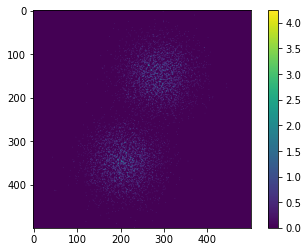

<built-in function len>
<built-in function len>
<built-in function len>
6278277.450449525 1380526.5802388408 5588014.160330105


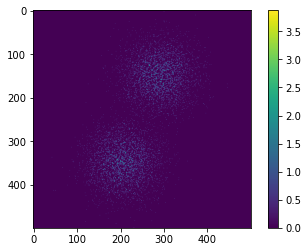

<built-in function len>
<built-in function len>
<built-in function len>
6280881.559045777 1382858.3359698807 5589452.391060837


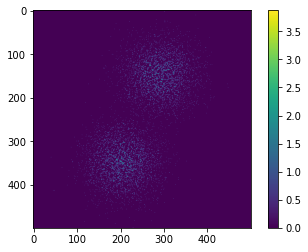

<built-in function len>
<built-in function len>
<built-in function len>
6283601.065763418 1385853.4667610398 5590674.332382898


KeyboardInterrupt: 

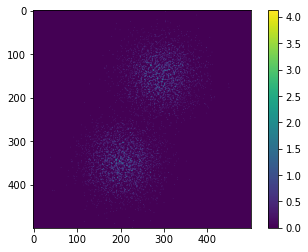

In [323]:
parts=particles()


parts.ics_2gauss()
parts.kernel = get_kernel(parts.ngrid, parts.soft)

plt.ion()
osamp=3

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
crap=ax.imshow(parts.rho[:parts.ngrid,:parts.ngrid]**0.5)

for i in range(1500):
    for j in range(osamp):
        parts.LT_NGP = get_LT_NGP(parts.ngrid, parts.gridWidth, parts.pos)
        parts.rho = get_rho(parts.ngrid, parts.gridWidth, parts.LT_NGP, parts.m)
        parts.pot = get_potential(parts.rho, parts.kernel, parts.ngrid )
        parts.f = get_force(parts.ngrid, parts.gridWidth, parts.LT_NGP, parts.pot)
        parts.pos, parts.v = take_step(parts.pos, parts.v, parts.f, parts.dt)
    kin=np.sum(parts.v**2)
    pot=np.sum(parts.rho*parts.pot)
    print(kin,pot,kin-0.5*pot)
    plt.clf()
    plt.imshow(parts.rho**0.5)#,vmin=0.9,vmax=1.1)
    plt.colorbar()


    crap.set_data(parts.rho[:parts.ngrid,:parts.ngrid]**0.5)
    plt.pause(0.001)

In [ ]:

ngrid = 100
npart = 100000
data = np.random.randn(npart,2)*(ngrid/12)+ngrid/2
rho = get_rho(ngrid,1,data,1)

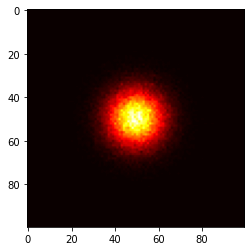

In [ ]:
plt.imshow(rho, cmap='hot')